<a href="https://colab.research.google.com/github/Manikanta-Korrapati/Machine-Learning-Projects/blob/main/Servo_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Servo Prediction using Linear Regression**

---



# **Objective**

The objective of this project is to develop a predictive model using linear regression to forecast the behavior of a servo mechanism. Leveraging machine learning techniques within Google Colab, we aim to analyze historical servo data to predict future servo positions accurately. This predictive model will be designed to anticipate servo movements based on input variables such as time, velocity, and possibly other relevant parameters. By achieving this objective, we aim to demonstrate the efficacy of linear regression in forecasting servo behavior, which could have practical applications in industries requiring precise control systems, robotics, and automation.

# **Import Library**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Import Data**

In [ ]:
df = pd.read_csv('https://github.com/YBI-Foundation/Dataset/raw/main/Servo%20Mechanism.csv')

# **Describe Data**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Motor   167 non-null    object
 1   Screw   167 non-null    object
 2   Pgain   167 non-null    int64 
 3   Vgain   167 non-null    int64 
 4   Class   167 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 6.6+ KB


In [ ]:
df.describe()

,Pgain,Vgain,Class
count,167.000000,167.000000,167.000000
mean,4.155689,2.538922,21.173653
std,1.017770,1.369850,13.908038
min,3.000000,1.000000,1.000000
25%,3.000000,1.000000,10.500000
50%,4.000000,2.000000,18.000000
75%,5.000000,4.000000,33.500000
max,6.000000,5.000000,51.000000


In [ ]:
df.head()

,Motor,Screw,Pgain,Vgain,Class
0,E,E,5,4,4
1,B,D,6,5,11
2,D,D,4,3,6
3,B,A,3,2,48
4,D,B,6,5,6


In [ ]:
df.replace({'Motor':{'A':0,'B':1,'C':2,'D':3,'E':4}},inplace=True)

In [ ]:
df.replace({'Screw':{'A':0,'B':1,'C':2,'D':3,'E':4}},inplace=True)

In [ ]:
df

,Motor,Screw,Pgain,Vgain,Class
0,4,4,5,4,4
1,1,4,6,5,11
2,4,4,4,3,6
3,1,0,3,2,48
4,4,1,6,5,6
...,...,...,...,...,...
162,1,2,3,2,44
163,1,4,3,1,40
164,2,4,4,3,25
165,0,1,3,2,44


# **Data Visualization**

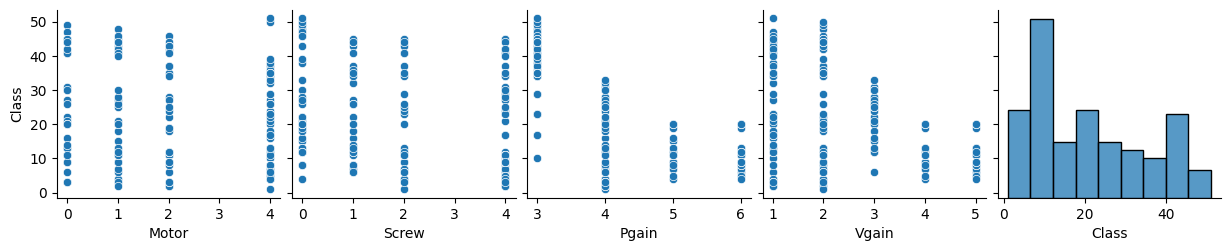

In [ ]:
sns.pairplot(df,x_vars =['Motor', 'Screw', 'Pgain', 'Vgain','Class'], y_vars=['Class']);

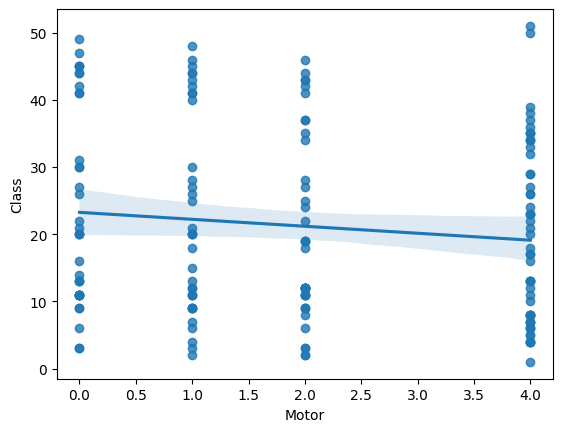

In [ ]:
sns.regplot(x='Motor',y='Class',data=df);

# **Data Preprocessing**

In [ ]:
df.shape

(167, 5)

In [ ]:
df.columns

Index(['Motor', 'Screw', 'Pgain', 'Vgain', 'Class'], dtype='object')

In [ ]:
df

,Motor,Screw,Pgain,Vgain,Class
0,4,4,5,4,4
1,1,4,6,5,11
2,4,4,4,3,6
3,1,0,3,2,48
4,4,1,6,5,6
...,...,...,...,...,...
162,1,2,3,2,44
163,1,4,3,1,40
164,2,4,4,3,25
165,0,1,3,2,44


In [ ]:
df[['Motor',]].value_counts()

Motor
4        55
2        40
0        36
1        36
dtype: int64

In [ ]:
df[['Screw',]].value_counts()

Screw
4        59
0        42
1        35
2        31
dtype: int64

# **Define Target Variable (y) and Feature Variables (X)**

In [ ]:
y = df['Class']
x = df[['Motor', 'Screw', 'Pgain', 'Vgain']]

In [ ]:
x.shape

(167, 4)

In [ ]:
y.shape

(167,)

# **Train Test Split**

In [ ]:
from sklearn.model_selection import  train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y)

In [ ]:
x_train.shape,x_test.shape

((125, 4), (42, 4))

In [ ]:
x_train,x_test

(     Motor  Screw  Pgain  Vgain
 162      1      2      3      2
 35       4      4      3      2
 94       0      4      4      1
 121      2      0      4      2
 67       4      2      3      2
 ..     ...    ...    ...    ...
 128      0      1      5      4
 29       1      1      3      2
 21       0      4      4      3
 88       1      4      5      4
 143      0      1      4      2
 
 [125 rows x 4 columns],
      Motor  Screw  Pgain  Vgain
 51       2      1      3      2
 44       1      0      5      3
 57       1      4      4      3
 112      2      4      6      5
 79       4      4      3      2
 81       0      2      6      5
 154      0      4      4      1
 114      4      0      4      3
 110      0      4      5      4
 42       2      2      4      3
 118      4      0      4      2
 33       2      0      6      2
 66       4      1      3      2
 164      2      4      4      3
 159      0      0      5      4
 47       4      4      4      2
 140      4     

In [ ]:
y_train.shape,y_test.shape

((125,), (42,))

In [ ]:
y_train,y_test

(162    44
 35     29
 94      3
 121    19
 67     34
        ..
 128    13
 29     43
 21     30
 88     11
 143    20
 Name: Class, Length: 125, dtype: int64,
 51     44
 44     15
 57     27
 112     9
 79     34
 81     11
 154     3
 114    33
 110    11
 42     24
 118    26
 33     12
 66     36
 164    25
 159    20
 47      8
 140    11
 50      8
 125    27
 135    12
 52     45
 11      7
 23     13
 78     45
 93     12
 2       6
 147    35
 71      4
 111    18
 161     9
 9      27
 119    35
 58     50
 18     12
 122    12
 86     21
 96     23
 101    44
 65     11
 105     3
 144    41
 139    41
 Name: Class, dtype: int64)

# **Modeling**

In [ ]:
from sklearn.linear_model import LinearRegression
ml=LinearRegression()

In [ ]:
ml.fit(x_train,y_train)

LinearRegression()

In [ ]:
ml.intercept_

84.50185198936573

In [ ]:
ml.coef_

array([ -1.91066771,  -2.5932065 , -17.17951658,   6.5249555 ])

# **Prediction**

In [ ]:
y_pred = ml.predict(x_test)

In [ ]:
y_pred

array([39.59867132, 16.26846785, 23.07515844, -0.14463144, 27.99771641,
        8.86311697, 11.93591516, 27.71598131, 14.33126506, 26.35090373,
       21.19102582, -9.34667194, 35.77733591, 21.16449074, 24.70409105,
       10.81819983, 10.81819983,  6.40685914, 31.53731673,  9.54565576,
       33.72971953, 11.87500723, 23.64728365, 35.64038724, -2.82171644,
       17.34315532, 27.99771641, 21.19102582, 18.48740573, -0.14463144,
       14.66607032, 25.29409633, 38.3705424 , 20.20021685,  1.30788915,
       17.34315532, 21.47276092, 35.64038724, 22.41915473, 14.63953524,
       34.30184474, 33.07371582])

# **Model Evaluation**

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error,mean_absolute_error

In [ ]:
mean_squared_error(y_test,y_pred)

71.15812105563069

In [ ]:
mean_absolute_error(y_test,y_pred)

6.9812880520219736

In [ ]:
mean_absolute_percentage_error(y_test,y_pred)

0.6533891953753386

# **Data Visualization of Actual vs Predicted Data**

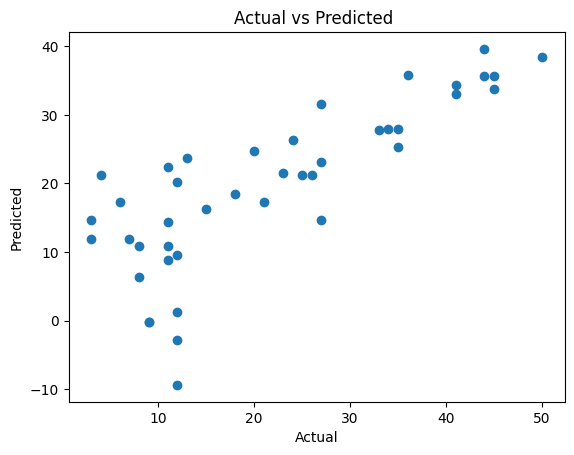

In [ ]:
plt.scatter(y_test,y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted ")
plt.show()

# **Future Predictions**

In [ ]:
x_new=df.sample(1)

In [ ]:
x_new

,Motor,Screw,Pgain,Vgain,Class
74,0,2,4,1,6


In [ ]:
x_new1=x_new.drop('Class',axis =1)

In [ ]:
x_new1

,Motor,Screw,Pgain,Vgain
74,0,2,4,1


In [ ]:
x_new1.shape

(1, 4)

In [ ]:
y.pred1 = ml.predict(x_new1)

In [ ]:
y.pred1

array([17.12232815])

# **Explaination**

Here in this project,I made a Machine Learning model with the help of Linear Regression Algorithm, that predict the Class of Servo Mechanism from the data  that consists of details like Motor,Screw,Pgain,Vgain.

Steps that are followed:

1.Import Library: Importing multiple python libraries that are required for this project.

2.Import and Describing Data: Importing the data set with the help  pandas library and  and describing it's content like shape,columns etc.

3.Data Visualization: Visualizing the data in the form of scatter plot for better understanding.

4.Data Preprocessing: Processing the data as reqiured to get output ,like converting alphate values to numerical values.

5.Define Target Variable (y) and Feature Variables (X): Defining the value that need to be predicted as y  and the data used to predit as x.

6.Train Test Split: Splitting the data into two segment such as train,test in order to train machine learning model  and test it.

7.Modeling: Selecting the model and training it with train data in order  to predict the output.

8.Prediction: Predicting the output from test data with the help of trained model.

9.Model Evaluation: Evaluating the accuracy of the trained model with mean squared error,mean absolute percentage error method etc.

10.Data Visualization of Actual vs Predicted Data: Visualizing the actual and predicter data of the model in the form scatter plot.


11.Future Predictions: Making the model to predict servo from new data that is creating in the form of trained data.

By following these steps ,I have created a machine learning model that helps to predict the Servo Mechanism using Linear Regression
























